# Data Analysis of Star Data
## This code is readable to any person with basic knowledge of python, feel free to comment! 
## (HR diagram is at the bottom)
---

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

from IPython.display import Markdown

In [2]:
# Loading our data into df
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Jupyter\astronomical data\Star Data.csv")
print(df)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

In [3]:
# random samples to get an intuition 
sample1 = df.sample(10)
sample1

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
14,2650,0.00060,0.1400,11.782,1,Red,M
44,3008,280000.00000,25.0000,-6.000,4,Red,M
201,15680,0.00122,0.0114,11.920,2,Blue,B
63,2835,0.00034,0.0918,16.960,0,Red,M
29,7230,0.00008,0.0130,14.080,2,Red,F
1,3042,0.00050,0.1542,16.600,0,Red,M
218,17140,883.00000,5.6530,-2.640,3,Blue-White,B
211,10012,552.00000,5.8560,0.013,3,Blue-White,A
174,3600,240000.00000,1190.0000,-7.890,5,Red,M
116,4015,282000.00000,1534.0000,-11.390,5,Red,K


In [4]:
# We have no 'null' cells, which is good!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
df_copy = df.copy()

#Naming all Star Types based on their numbers
df['Star type'] = df['Star type'].astype(str)

df.loc[df['Star type'] == '0', 'Star type'] = 'Brown Dwarf' 
df.loc[df['Star type'] == '1', 'Star type'] = 'Red Dwarf' 
df.loc[df['Star type'] == '2', 'Star type'] = 'White Dwarf' 
df.loc[df['Star type'] == '3', 'Star type'] = 'Main Sequence' 
df.loc[df['Star type'] == '4', 'Star type'] = 'Supergiants' 
df.loc[df['Star type'] == '5', 'Star type'] = 'Hypergiants' 

# List of Star types with their total count
df['Star type'].value_counts()

df = df_copy

---
# Histogram of Temperatures of Stars
What is the most common temperature for Stars?


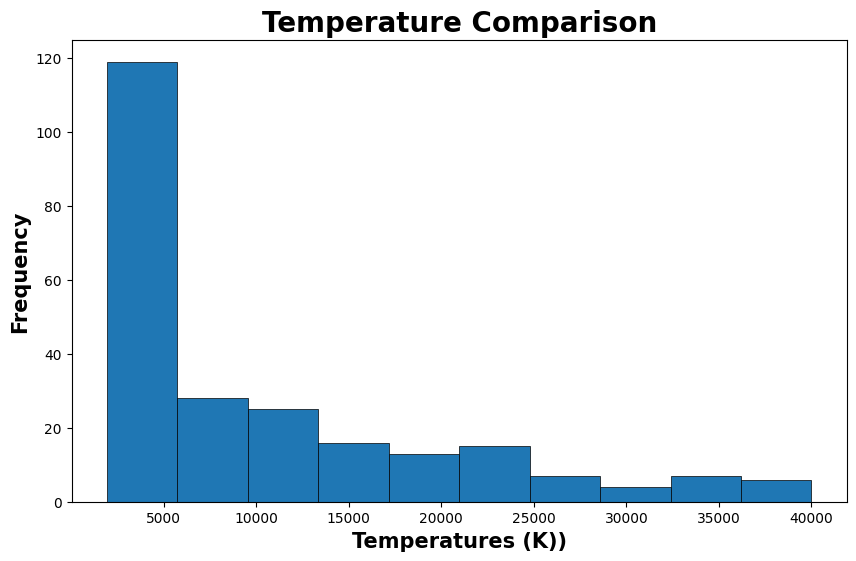

In [6]:
# loading in our data
x_temp = df.loc[:, 'Temperature (K)']

# plotting it suing matplotlib
fig, ax = plt.subplots()
ax.hist(x_temp, 
        linewidth=0.5,
        edgecolor="black")

# labels
plt.xlabel('Temperatures (K))',  
           fontsize = 15,
           weight='bold')
plt.ylabel('Frequency', 
           fontsize = 15, 
           weight='bold')

plt.title('Temperature Comparison', 
          fontsize = 20,
          weight='bold')

plt.show()

## Conclusion
Most star temperatures lie below 5,000 Kelvin

---
# Histogram of Absolute Magnitude
- How many stars are the bright or dim in our data?
- How is *Absolute* magnitude negative for some stars? 

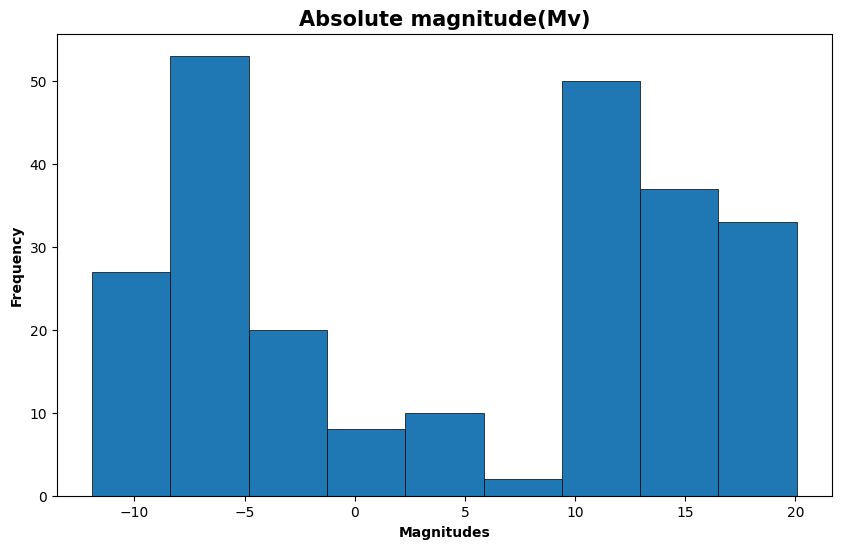

In [7]:
# Loading our data
x_mag = df.loc[:, 'Absolute magnitude(Mv)']

#plotting the histogram
fig, ax = plt.subplots()
ax.hist(x_mag, 
        bins='auto', 
        linewidth=0.5,
        edgecolor="black")

# ax.set(xlim=(-25, 25))

# labeling again
plt.xlabel('Magnitudes',  
           fontsize = 10,
           weight='bold')
plt.ylabel('Frequency', 
           fontsize = 10,
           weight='bold')

plt.title('Absolute magnitude(Mv)', 
          fontsize = 15, 
          weight='bold')

plt.show()

## Conclusion
- Most Magnitudes lie in (-10,-5) and (10,15)
- Absolute magnitudes are taken in reference to Vega Star and hence can also be -ve <br>
  click the link below to understand this concept
  

In [8]:
# Here I am only creating a link for your curiosity
link_text = "Click here to understand Stellar Magnitude"
link_url = "https://earthsky.org/astronomy-essentials/what-is-stellar-magnitude/#:~:text=People%20often%20find%20the%20magnitude,an%20apparent%20magnitude%20of%20%2D1.44."
Markdown(f"[{link_text}]({link_url})")

[Click here to understand Stellar Magnitude](https://earthsky.org/astronomy-essentials/what-is-stellar-magnitude/#:~:text=People%20often%20find%20the%20magnitude,an%20apparent%20magnitude%20of%20%2D1.44.)

---

>## Exponential Histograms
> - The next two are exponential histograms! Meaning both their axes are exponentially increasing.
> - This is done to fit in all our values. Such values are created due to the ratio taken
> - Luminosity(L/Lo) - Ratio of Luminosity of the star **compared** to our sun
> - Similarly the Radius(R/Ro)


---
# Exponential Histogram of Luminosity of Stars 
- How many of the Stars are brighter than our Sun
- And by how much? 

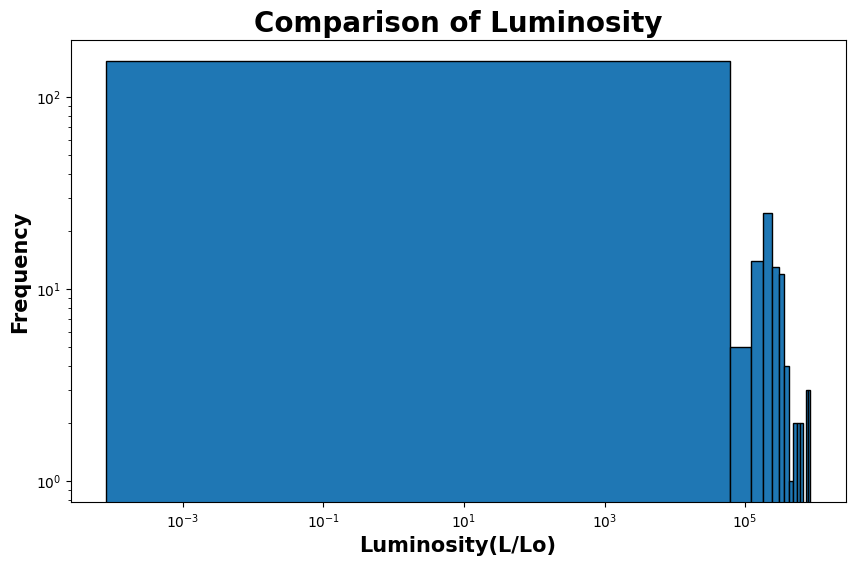

In [9]:
# loading our data
x_lum = df.loc[:, 'Luminosity(L/Lo)']

# plotting it 
fig, ax = plt.subplots()

# 'Bins' = 'classes' for each bar
hist, edges = np.histogram(x_lum, bins='auto')
bin_centers = (edges[:-1] + edges[1:]) / 2

plt.bar(bin_centers, hist, 
        width=np.diff(edges),
        edgecolor='black')

# exponential scales as I explained up there
plt.xscale('log')
plt.yscale('log')

# labeling
plt.xlabel('Luminosity(L/Lo)',  
           fontsize = 15,
           weight='bold')
plt.ylabel('Frequency', 
           fontsize = 15,
           weight='bold')

plt.title('Comparison of Luminosity',
          fontsize = 20,
          weight='bold')

plt.show()

In [10]:
# This is to give us an intuition of the distribution
luminosity_mean = df.loc[:, 'Luminosity(L/Lo)'].mean()
print(f'Mean = {luminosity_mean}')

luminosity_median = df.loc[:, 'Luminosity(L/Lo)'].median()
print(f'Median = {luminosity_median}')

Mean = 107188.36163460833
Median = 0.07050000000000001


## Conclusion
- From this graph we can see that *Median* is smaller than 1
- Hence more than 50% stars are dimmer than our sun

---
# Exponential Histogram of Radius of Stars 
- How many of the Stars are Bigger than our Sun
- And by how much?


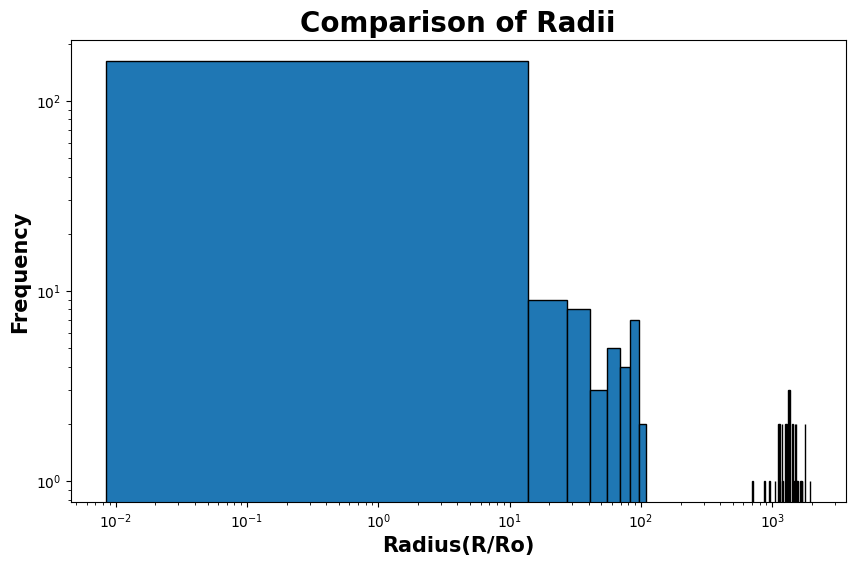

In [11]:
# loading our data everytime
x_radius = df.loc[:, 'Radius(R/Ro)']

# plotting 
fig, ax = plt.subplots()

hist, edges = np.histogram(x_radius, bins='auto')
bin_centers = (edges[:-1] + edges[1:]) / 2

plt.bar(bin_centers, 
        hist,
        width=np.diff(edges),
        edgecolor='black')

# exponential scales
plt.xscale('log')
plt.yscale('log')

# labels
plt.xlabel('Radius(R/Ro)',  
           fontsize = 15, 
           weight='bold')
plt.ylabel('Frequency', 
           fontsize = 15, 
           weight='bold')

plt.title('Comparison of Radii', 
          fontsize = 20,
          weight='bold')

plt.show()

In [12]:
# again to give us an intuition, focus on the median here
radius_mean = df.loc[:, 'Radius(R/Ro)'].mean()
print(f'Mean = {radius_mean}')

radius_median = df.loc[:, 'Radius(R/Ro)'].median()
print(f'Median = {radius_median}')

Mean = 237.157781375
Median = 0.7625


## Conclusion
- From this graph we can see that *Median* is smaller than 1
- Hence more than 50% stars are smaller than our sun
- very few are extremely large, about e+3 times than our sun

<function matplotlib.pyplot.show(close=None, block=None)>

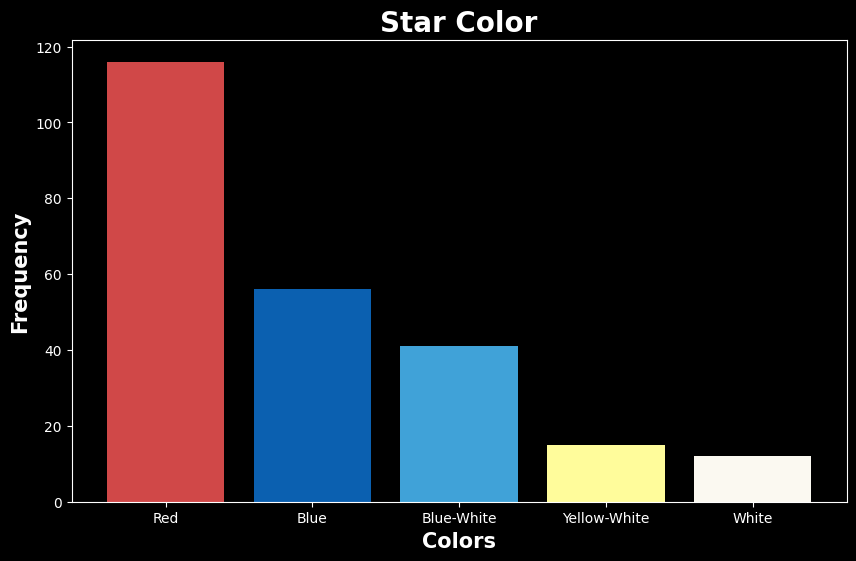

In [13]:
# loading our values yet again
xvalues = df.loc[:, 'Star color'].value_counts().index.tolist()
yvalues = df.loc[:, 'Star color'].value_counts().tolist()

# to look cool
plt.style.use('dark_background')

# colors to match the star colos
plt.bar(xvalues, 
        yvalues, 
        color=['#D04848', '#0B60B0', '#40A2D8', '#FFFC9B', '#FBF9F1'])

# lables
plt.xlabel('Colors', 
           fontsize = 15, 
           weight='bold')
plt.ylabel('Frequency', 
           fontsize = 15, 
           weight='bold')

plt.title('Star Color', 
          fontsize = 20, 
          weight='bold')

plt.show

---
# Box Plots
## Made with respect to 'Star Types'
## Box plots are helpful for:
- **Outlier Detection** - The small 'o' outside the box plots are called the outliers
- **Statistical Analysis** - Box plots provide with mean of data after taking out the outliers!

## Made using Seaborn Lib

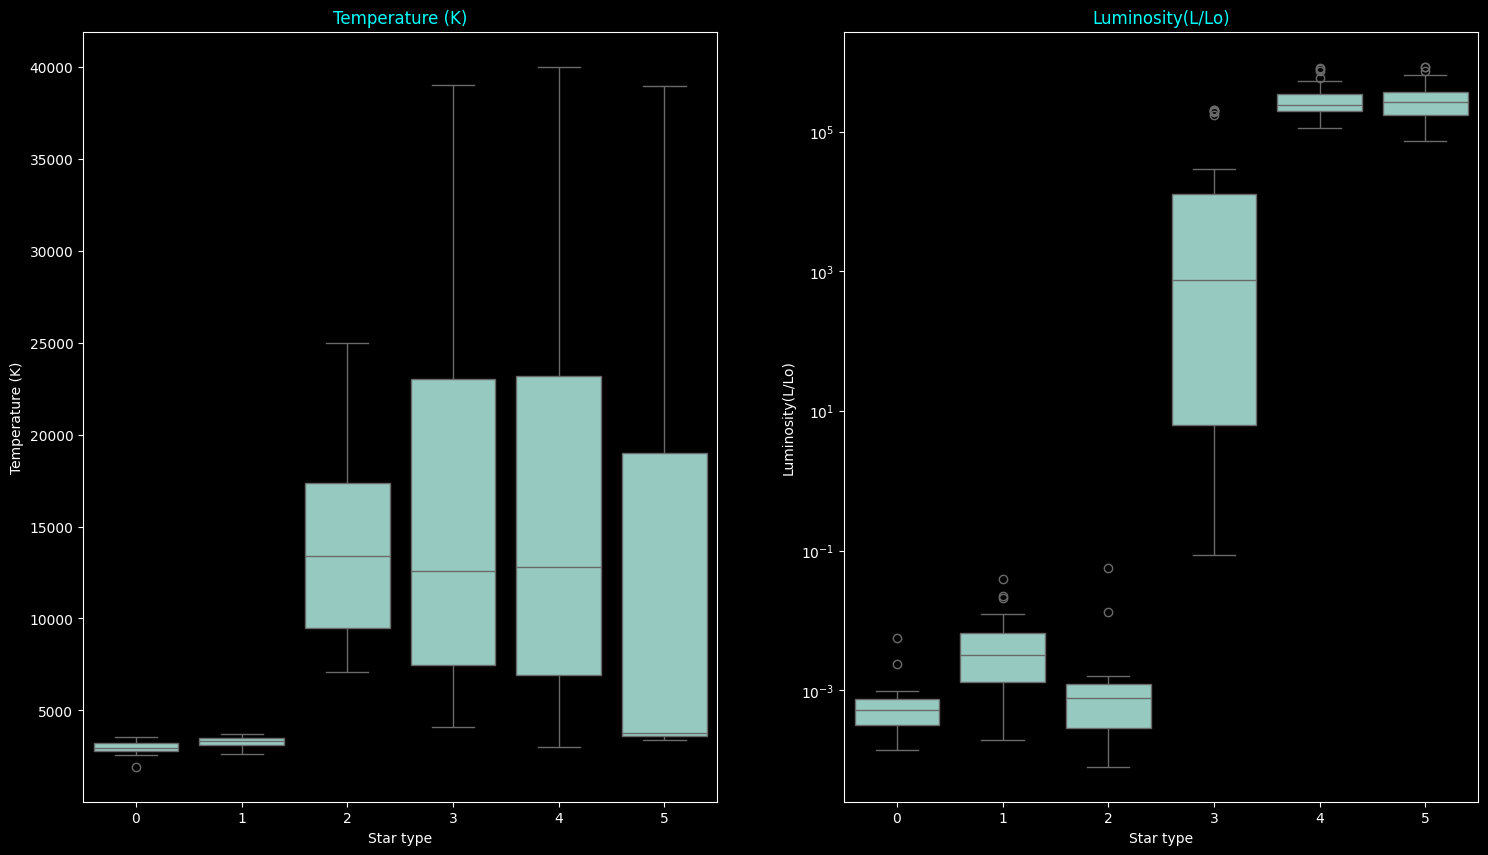

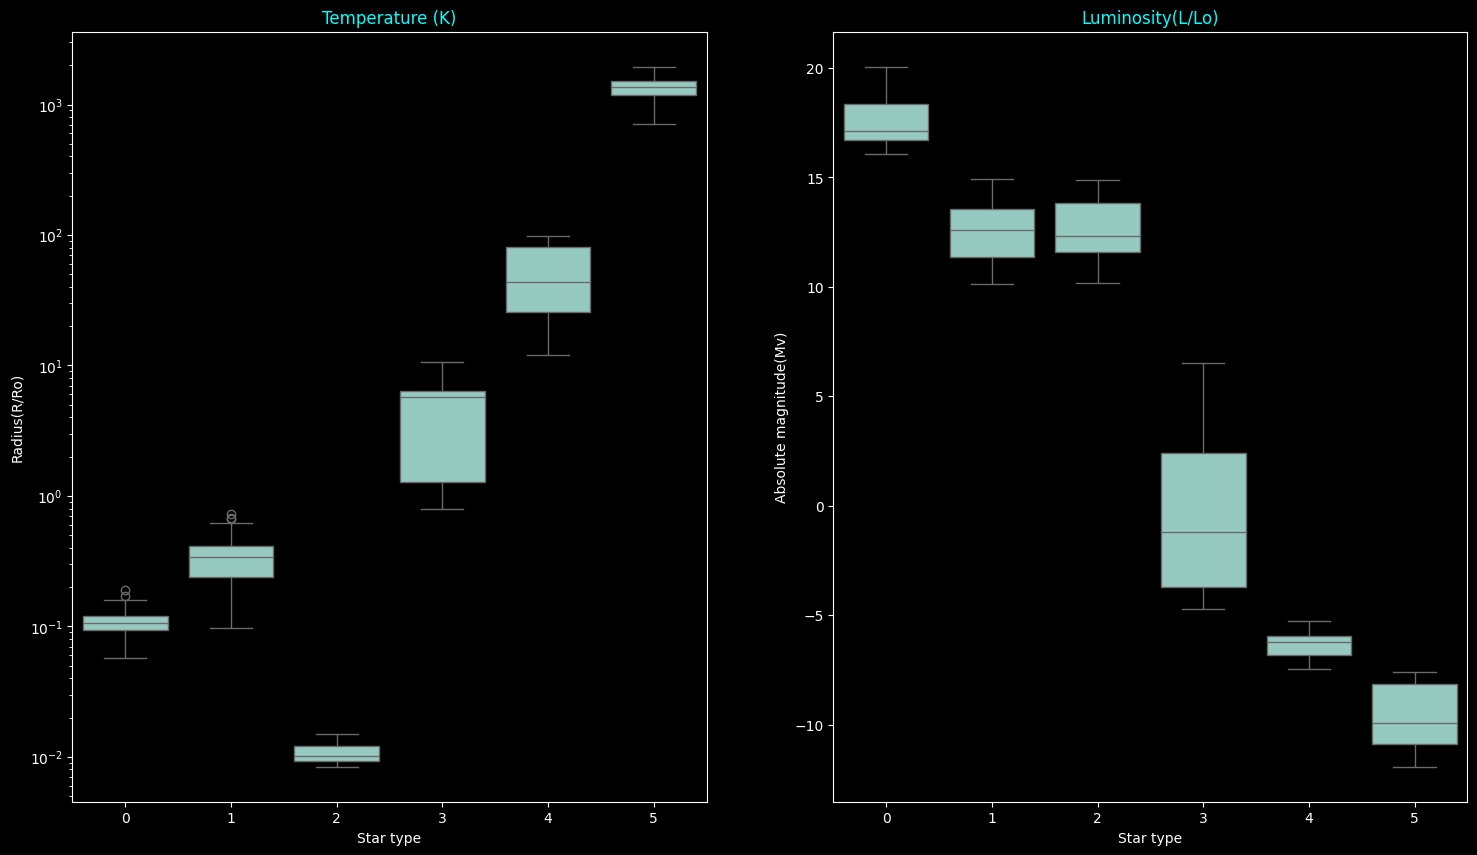

In [14]:
print('\n')
# The first 2 Plots
plt.figure(figsize=(18, 10))

# plotting graphs with 'for' loop
for i in range(2):
    
    # subplots mean the division of our into multiple plots
    plt.subplot(1,2,i+1)
    
    sns.boxplot(x = df['Star type'], y = df.iloc[:,i], showfliers=True)
    plt.title(df.columns[i], color= 'cyan')

    # exponential scale
    if i == 1:
        plt.yscale('log')

plt.show()

print('\n')

# The second 2
plt.figure(figsize=(18, 10))

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.boxplot(x = df['Star type'], y = df.iloc[:,i+2])

    plt.title(df.columns[i], color='cyan')

    #exponential scale
    if i == 0:
        plt.yscale('log')
        
plt.show()

---
# Line Plots
## Made with respect to 'Star Types'
## Line plots are helpful for:
- To track changes over short and long periods of time.
- Short bursts can be graphed in a line plot.
  
## Made using Seaborn Lib

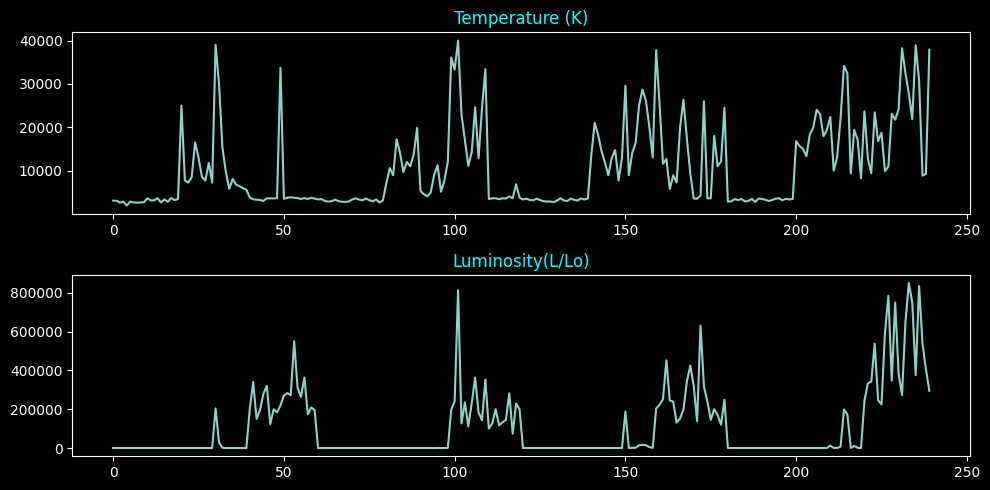

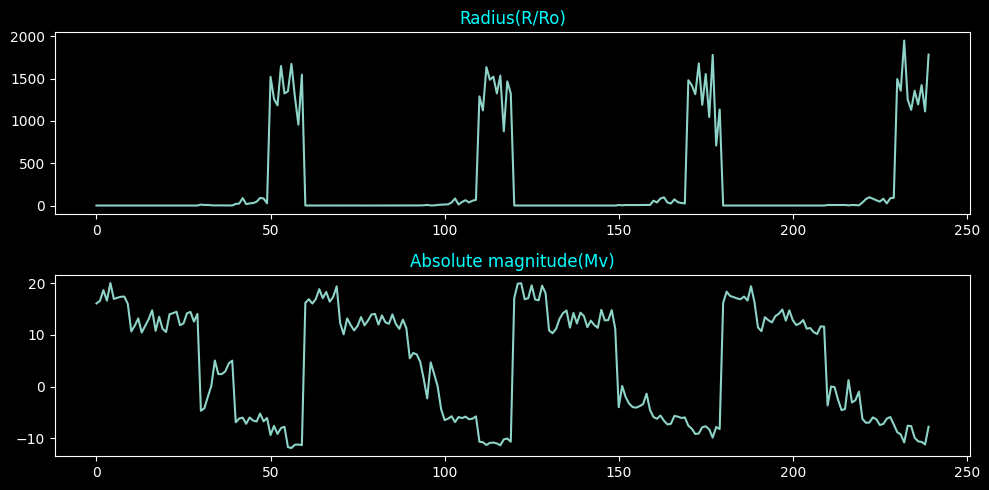

In [15]:
# defining our subplot limits
subplot_width = 10
subplot_height = 5

# first 2 subplots
plt.figure(figsize=(subplot_width,subplot_height))

for i in range(2):
    plt.subplot(2,1,i+1)
    plt.plot(df.iloc[:,i])
    plt.title(df.columns[i], 
              color = 'cyan')
    plt.tight_layout()
    
plt.show()


# second 2 subplots
plt.figure(figsize=(subplot_width,subplot_height))

for i in range(2):
    plt.subplot(2,1,i+1)
    plt.plot(df.iloc[:,i+2])
    plt.title(df.columns[i+2], 
              color = 'cyan')
    plt.tight_layout()

plt.show()

---
# Pairplot
## Pairplot allows us to plot pairwise relationships between variables within a dataset!

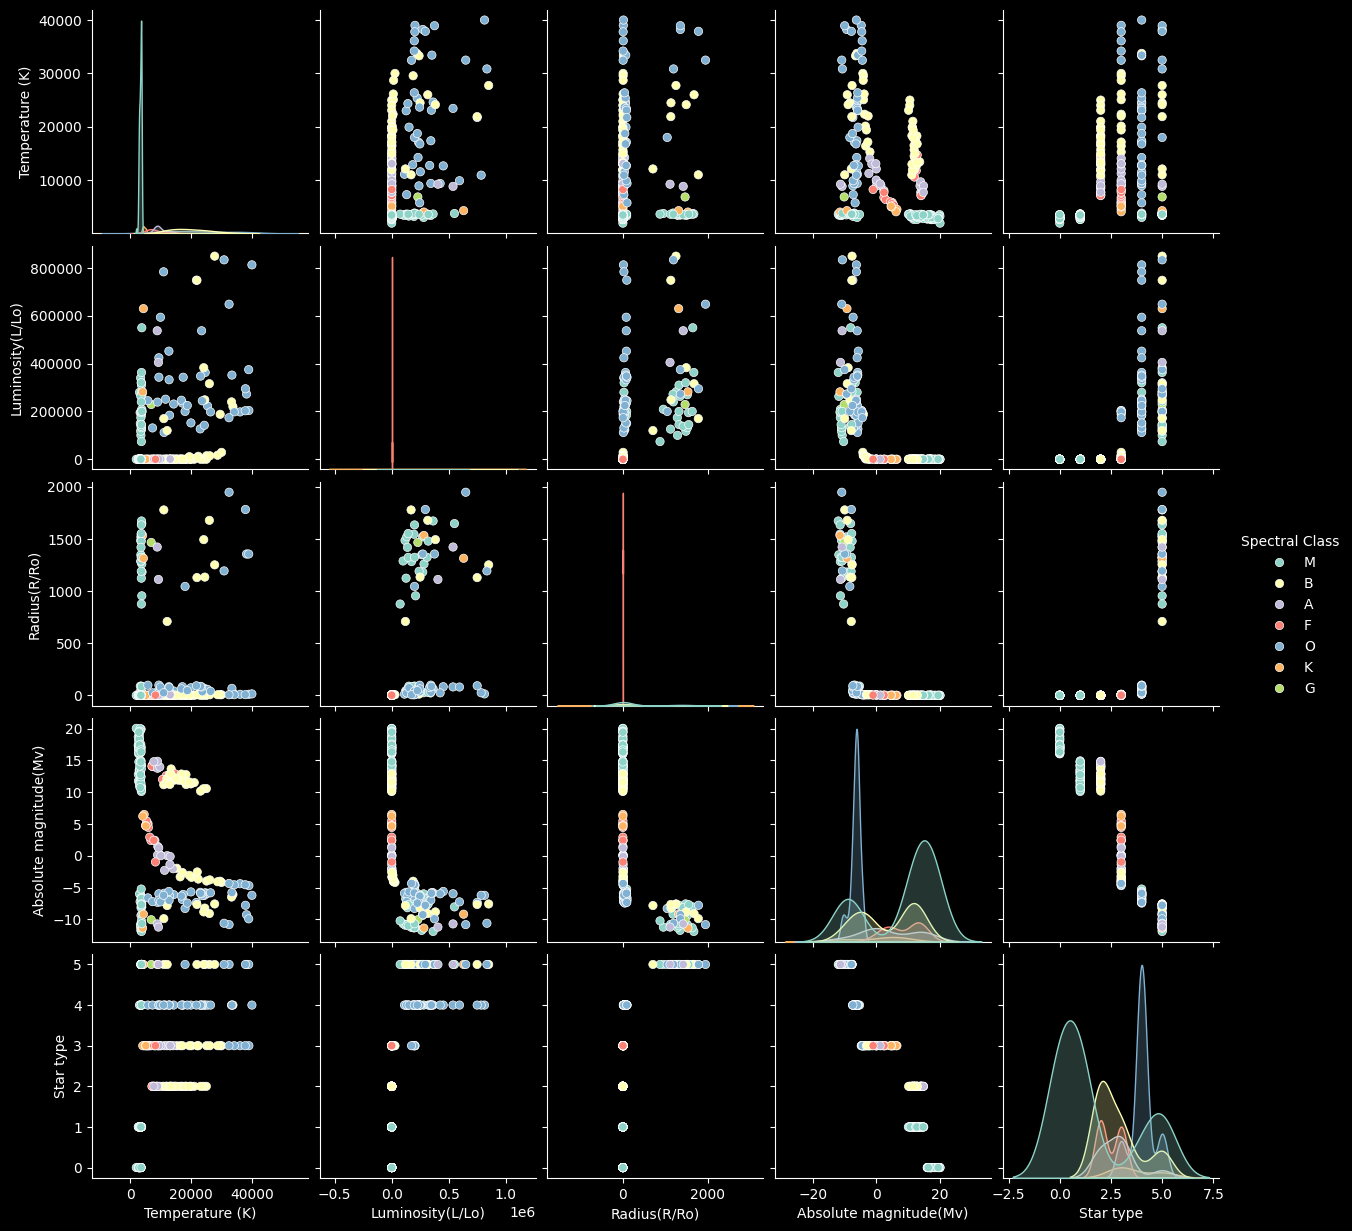

In [16]:
# seaborn lib helps a lot with our plotting
# these 25 plots have everything we need, though not in detail
sns.pairplot(df, hue = 'Spectral Class')    
plt.show()
# legend on the left


# HR Diagram

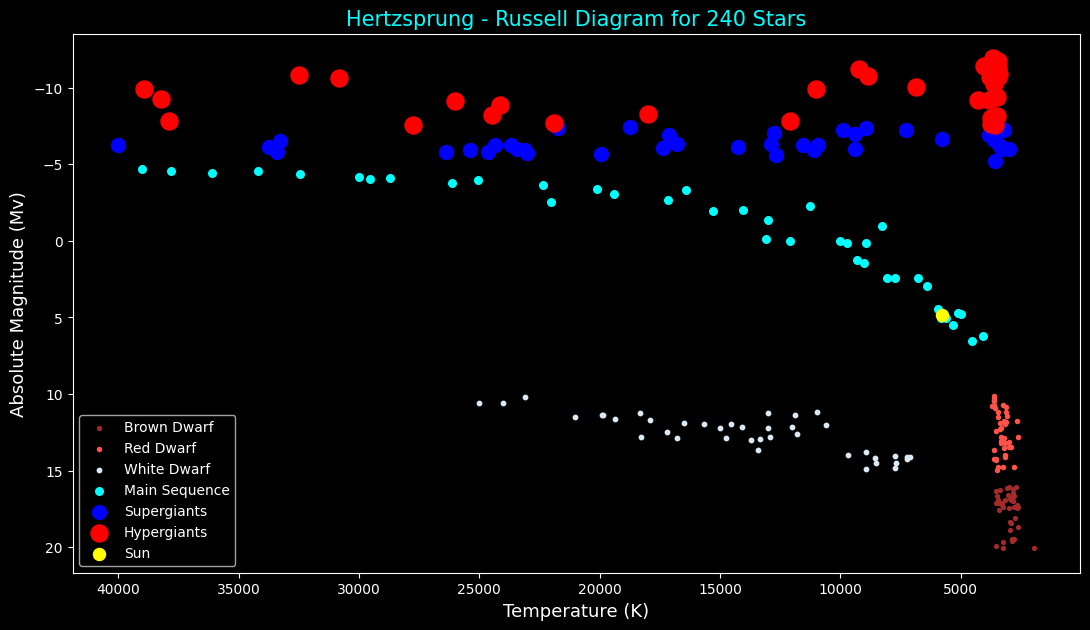

In [17]:
# loading our data into variables
temperature = df["Temperature (K)"].values
abs_mag = df['Absolute magnitude(Mv)'].values
star_type = df['Star type'].values

# telling python we are supposed to plot our points
star_types = {
    0: {'label': 'Brown Dwarf', 'color': '#A52A2A', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': '#FF5349', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': '#dbe9f4', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'blue', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'red', 'size': 150, 'marker': 'o'}
}

# plotting
plt.figure(figsize=(13,7))

# eponential scale for temperature
# plt.xscale('log')

# Empty list and set to store ax and label of star_type
axes = []
labels = set()


# For each and every star in the data
for i in range(len(star_type)):
  properties = star_types[star_type[i]]
    
  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i], 
                     abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])
    axes.append(ax)
    labels.add(properties['label'])
  else:
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])

# adding our Sun for comparison
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

#labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13)
plt.xlabel("Temperature (K)", fontsize=13)

# to help understand our points (bottom left corner)
plt.legend(handles=axes)

# both our axis are inverted to better make sense of our plot
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='Cyan')

plt.show()

# Thankyou 
## Feel free to write any comments or suggestions